# Mini-Project 2: Clustering

In [56]:
import pandas as pd
import numpy as np
from scipy.cluster.hierarchy import dendrogram, linkage      
import sklearn.feature_extraction.text as sk_text
import sklearn.cluster as sk_cluster
import sklearn.metrics as metrics
%matplotlib inline
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
pd.set_option('display.max_colwidth', -1)
import datetime

In [57]:
df = pd.read_csv('P2clean_data.csv')

In [58]:
df.head()

,Unnamed: 0,Name,ScreenName,UserID,FollowersCount,FriendsCount,Location,Description,CreatedAt,StatusID,Language,Place,RetweetCount,FavoriteCount,Text,Hashtags,Over20
0,6,David Walling,davidjwalling,106568768,975,2781,"Dallas, TX",Bloodletting secure algorithms close to the bone. #HealthIT security matters. Opinions my own. https://t.co/Dcpe6FteOq,Sat Oct 29 00:16:48 EEST 2016,792112907488079872,en,NaN,0,0,#infosec #Intel #ACM #IEEE Impacts Haswell microarch. Paper proposes mitigations that could prevent BTB-based side https://t.co/DW6vgRAPrv,#infosec #Intel #ACM #IEEE,#infosec
1,13,Harry Binford,CaptainNormal,2447279666,895,1224,USA,"Proud Christian husband, frequent shooting range attendee, and former law enforcement. Lifetime member of the NRA. Pro-life, Jesus is Lord. America first.",Thu Oct 27 21:44:44 EEST 2016,791712249685676032,en,NaN,0,0,@WayneDupreeShow #climatechange is the democrats' attempt to play God,@WayneDupreeShow #climatechange,@WayneDupreeShow #climatechange
2,24,Deplorable Mina,minasmith64,2307021294,6808,6998,127.0.0.1,"Farm owner, horse lover, gun lover. Anti-Feminist. #RedneckTaliban:Warrant Officer (honorary) #GamerGate #AltRight #Trump2016",Wed Oct 26 16:02:10 EEST 2016,791263651617394688,en,"PlaceJSONImpl{name='Elgin', streetAddress='null', countryCode='US', id='7c4ae4537997a58f', country='United States', placeType='city', url='https://api.twitter.com/1.1/geo/id/7c4ae4537997a58f.json', fullName='Elgin, IL', boundingBoxType='Polygon', boundingBoxCoordinates=[[Ltwitter4j.GeoLocation;@274e98b7], geometryType='null', geometryCoordinates=null, containedWithIn=[]}",0,0,Too bad #MegynKelly remains obsessed w hammering every #Trump2016 surrogate on her show w salacious sex charges no https://t.co/SPWkgHpqcE,#MegynKelly #Trump2016,#MegynKelly #Trump2016
3,34,My Info,chrisf91,2424856262,129,822,"San Antonio, TX","im not supersticous, but... i am a little sticious...",Fri Oct 28 09:34:20 EEST 2016,791890827974840322,en,NaN,0,0,"@mlombardifoxtv its ok to admit bill bellichick cusses out his players! Hey @ochocinco this dude dont beleive u, hes all on pats nuts.",@mlombardifoxtv @ochocinco,@ochocinco
4,40,Maria Sanchez,ShieldGirl127,1708905816,1084,2400,"Phoenix, AZ",LUCHA UNDERGROUND/WWE/Teen Wolf/The Walking Dead/Total Divas/Total Bellas Fan.If Your Not Smiling Your Doing It Wrong. SMILEMORE,Mon Oct 31 04:48:16 EET 2016,792921100418060289,en,"PlaceJSONImpl{name='Phoenix', streetAddress='null', countryCode='US', id='5c62ffb0f0f3479d', country='United States', placeType='city', url='https://api.twitter.com/1.1/geo/id/5c62ffb0f0f3479d.json', fullName='Phoenix, AZ', boundingBoxType='Polygon', boundingBoxCoordinates=[[Ltwitter4j.GeoLocation;@12c35d2d], geometryType='null', geometryCoordinates=null, containedWithIn=[]}",0,0,Match hasn't started yet and these two women are killing it! #RawWomensChampion #HIAC,#RawWomensChampion #HIAC,#HIAC


## Task 1.1 (20 pts): Let’s apply clustering and compare the clustering result against a known ground truth. In the file “clinton_trump_user_classes.txt”, we have the ground truth “class” membership for each user id in the data. Class 0 corresponds to Trump followers, while class 1 corresponds to Clinton followers.

In [59]:
df_hashtag_agg  = df.groupby('UserID')['Over20'].sum()
df_ready_for_sklearn = pd.DataFrame({'User_id':df_hashtag_agg.index, 'All_hashtags': df_hashtag_agg.values})

In [60]:
vectorizer = sk_text.TfidfVectorizer(max_features = 5000, min_df = 100, stop_words = 'english')

In [61]:
df_cols = ['User_id', 'Choice']
df1 = pd.read_table("clinton_trump_user_classes.txt",encoding="ISO-8859-1",header=None,names=df_cols)

In [62]:
mergedText = pd.merge(df_ready_for_sklearn, df1, on='User_id')

In [63]:
mergedText

User_id  \
0     2426         
1     1026541      
2     1134681      
3     1201691      
4     1329901      
5     1354481      
6     1366631      
7     1386571      
8     1428731      
9     1449381      
10    1455431      
11    1477971      
12    1569091      
13    1687071      
14    1688571      
15    1787311      
16    1790991      
17    1793401      
18    1970791      
19    2030711      
20    2091441      
21    2234711      
22    2284131      
23    2311561      
24    2342471      
25    2402621      
26    10084232     
27    10173962     
28    10245552     
29    10252572     
...        ...     
8891  2505220368   
8892  2505580657   
8893  2505905929   
8894  2506566913   
8895  2507338960   
8896  2507994280   
8897  2508588786   
8898  2508780644   
8899  2508827207   
8900  2509461094   
8901  2509571245   
8902  2510090210   
8903  2510356861   
8904  2511263962   
8905  2511274210   
8906  2511594906   
8907  2515801909   
8908  2516175110   
8909  2516181758   
8910  2516656489   
8911  2517527407   
8912  2517861180   
8913  2517885577   
8914  2519552569   
8915  2519981617   
8916  2520487656   
8917  2521149576   
8918  2521541502   
8919  2521929295   
8920  2522209999   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                

In [64]:
mergedText.All_hashtags = mergedText.All_hashtags.str.replace(' ', '')
mergedText.All_hashtags = mergedText.All_hashtags.str.replace('@', ' ')
mergedText.All_hashtags = mergedText.All_hashtags.str.replace('#', ' ')
mergedText.All_hashtags = mergedText.All_hashtags.str.lstrip()

In [65]:
#mergedText['All_hashtags']= mergedText['All_hashtags'].str.split(" ", n = 10, expand = True)

In [66]:
mergedText

User_id  \
0     2426         
1     1026541      
2     1134681      
3     1201691      
4     1329901      
5     1354481      
6     1366631      
7     1386571      
8     1428731      
9     1449381      
10    1455431      
11    1477971      
12    1569091      
13    1687071      
14    1688571      
15    1787311      
16    1790991      
17    1793401      
18    1970791      
19    2030711      
20    2091441      
21    2234711      
22    2284131      
23    2311561      
24    2342471      
25    2402621      
26    10084232     
27    10173962     
28    10245552     
29    10252572     
...        ...     
8891  2505220368   
8892  2505580657   
8893  2505905929   
8894  2506566913   
8895  2507338960   
8896  2507994280   
8897  2508588786   
8898  2508780644   
8899  2508827207   
8900  2509461094   
8901  2509571245   
8902  2510090210   
8903  2510356861   
8904  2511263962   
8905  2511274210   
8906  2511594906   
8907  2515801909   
8908  2516175110   
8909  2516181758   
8910  2516656489   
8911  2517527407   
8912  2517861180   
8913  2517885577   
8914  2519552569   
8915  2519981617   
8916  2520487656   
8917  2521149576   
8918  2521541502   
8919  2521929295   
8920  2522209999   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                

In [67]:
matrix = vectorizer.fit_transform(df_ready_for_sklearn.All_hashtags.values)

In [68]:
print(type(matrix))

<class 'scipy.sparse.csr.csr_matrix'>


In [69]:
tfidf_data = matrix.toarray() 
print(tfidf_data)

[[0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.20495192]
 ...
 [0.         0.         0.         ... 0.03523578 0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]]


In [70]:
tfidf_data.shape

(8921, 433)

In [71]:
kmeans = sk_cluster.KMeans(n_clusters=2, max_iter=100, n_init=10)

In [72]:
km_labels = kmeans.fit_predict(tfidf_data)
print(vectorizer.get_feature_names())

['0hour1__', '2a', '8217', '_makada_', 'abc', 'abcpolitics', 'ac360', 'adele', 'ajdelgado13', 'alivitali', 'allenwest', 'amazon', 'america', 'amjoy', 'amjoyshow', 'amymek', 'ananavarro', 'andersoncooper', 'angela_rye', 'anncoulter', 'anthonyweiner', 'ap', 'ap_politics', 'apple', 'aravosis', 'arimelber', 'asamjulian', 'barackobama', 'bbcnews', 'bbcworld', 'bencjacobs', 'benghazi', 'benshapiro', 'berniesanders', 'bfraser747', 'billclinton', 'billkristol', 'billmaher', 'blacklivesmatter', 'bostonglobe', 'bpolitics', 'braddjaffy', 'breaking', 'breitbartnews', 'bretbaier', 'brexit', 'brianefallon', 'brianstelter', 'brithume', 'brunelldonald', 'business', 'buzzfeednews', 'c0nvey', 'carminezozzora', 'cavs', 'cbs', 'cbsnews', 'cernovich', 'change', 'charlesmblow', 'charliekirk11', 'chelseaclinton', 'cher', 'chriscuomo', 'chrislhayes', 'christichat', 'chucktodd', 'chuckwoolery', 'clinton', 'clintonemails', 'clintonfdn', 'clintonfoundation', 'cnbc', 'cnn', 'cnnbrk', 'cnnmoney', 'cnnpolitics', 'c

In [73]:
print ('Cluster labels')
print(km_labels)

centroids = kmeans.cluster_centers_
print ('Cluster Centroids')
print(centroids)

error = kmeans.inertia_
print ("The total error of the clustering is: ", error)

Cluster labels
[0 0 0 ... 0 0 0]
Cluster Centroids
[[ 5.34009836e-03  2.15248357e-03  3.76359933e-03  1.46625356e-03
   1.31281708e-02  4.27333705e-03  2.86072245e-03  2.21192977e-03
   2.45906657e-03  2.35248342e-03  2.14856287e-03  7.49276753e-03
   2.68264450e-03  4.13869094e-03  4.95302362e-03  1.80449841e-03
   6.39333511e-03  1.87936083e-03  2.32908720e-03  3.78013630e-03
   1.48037301e-03  7.25321467e-03  1.76839080e-03  5.70650009e-03
   2.32123627e-03  2.28268994e-03  4.26347198e-03  6.65693010e-03
   4.54448763e-03  2.34073518e-03  2.85638361e-03  1.74209444e-03
   2.57644792e-03  4.30293211e-03  3.02876340e-03  4.84136820e-03
   2.64874293e-03  2.49905094e-03  2.73022408e-03  2.64774795e-03
   2.60822681e-03  3.35526946e-03  4.15898374e-03  1.07641341e-02
   5.02452571e-03  6.77151303e-03  3.35634709e-03  5.61192689e-03
   5.36400411e-03  1.65845342e-03  8.12433722e-03  3.32048030e-03
   7.89088488e-03  2.77099270e-03  2.85239727e-03  1.96746177e-03
   8.11308191e-03  7.5181

In [74]:
asc_order_centroids = kmeans.cluster_centers_.argsort()    # argsort() returns the indices that would sort an array.
des_order_centroids = asc_order_centroids[:,::-1]

In [75]:
true = mergedText.Choice.astype(int).values

In [76]:
confusion = metrics.confusion_matrix(true, kmeans.labels_, labels=[0, 1])
precision = metrics.precision_score(true, kmeans.labels_, average='weighted')
recall = metrics.recall_score(true, kmeans.labels_, average='weighted')
fMeasure = metrics.f1_score(true, kmeans.labels_, average='weighted')

In [77]:
print(confusion)
print(precision)
print(recall)
print(fMeasure)

[[4213  391]
 [4062  255]]
0.4537703431629118
0.50084071292456
0.38737284049362125


### Agglomerative clustering algorithm (max-based)

In [115]:
ag = sk_cluster.AgglomerativeClustering(linkage = 'complete', n_clusters = 2)   


ag_labels = ag.fit_predict(tfidf_data)

print ('\nPrinting cluster assignment:')
ag_labels


Printing cluster assignment:


array([0, 0, 1, ..., 0, 0, 1])

In [79]:
confusion = metrics.confusion_matrix(true, ag.labels_, labels=[0, 1])
precision = metrics.precision_score(true, ag.labels_, average='weighted')
recall = metrics.recall_score(true, ag.labels_, average='weighted')
fMeasure = metrics.f1_score(true, ag.labels_, average='weighted')

In [80]:
print(confusion)
print(precision)
print(recall)
print(fMeasure)

[[3349 1255]
 [3310 1007]]
0.4749837108666423
0.4882860665844636
0.455049818734412


### Agglomerative clustering algorithm (SSE-based)

In [81]:
ag = sk_cluster.AgglomerativeClustering(linkage = 'ward', n_clusters = 2)   

#complete: The maximum distances
#n_clusters: The number of clusters to find.

ag_labels = ag.fit_predict(tfidf_data)

print ('\nPrinting cluster assignment:')
ag_labels


Printing cluster assignment:


array([0, 0, 0, ..., 0, 0, 0])

In [82]:
confusion = metrics.confusion_matrix(true, ag.labels_, labels=[0, 1])
precision = metrics.precision_score(true, ag.labels_, average='weighted')
recall = metrics.recall_score(true, ag.labels_, average='weighted')
fMeasure = metrics.f1_score(true, ag.labels_, average='weighted')

In [83]:
print(confusion)
print(precision)
print(recall)
print(fMeasure)

[[4240  364]
 [4109  208]]
0.4380604996179651
0.49859881179239995
0.37904393355190114


# Task 1.2 (10 pts): For k-means, look at the two centers (centroids) and print the top-30 hashtags/handles with the highest tfidf values.

In [84]:
terms = vectorizer.get_feature_names()
print ("All the terms:")
print(terms, '\n')

for i in range(2):
    print ("Cluster:", i)
    for ind in des_order_centroids[i, :30]:
        print (terms[ind])
    print()

All the terms:
['0hour1__', '2a', '8217', '_makada_', 'abc', 'abcpolitics', 'ac360', 'adele', 'ajdelgado13', 'alivitali', 'allenwest', 'amazon', 'america', 'amjoy', 'amjoyshow', 'amymek', 'ananavarro', 'andersoncooper', 'angela_rye', 'anncoulter', 'anthonyweiner', 'ap', 'ap_politics', 'apple', 'aravosis', 'arimelber', 'asamjulian', 'barackobama', 'bbcnews', 'bbcworld', 'bencjacobs', 'benghazi', 'benshapiro', 'berniesanders', 'bfraser747', 'billclinton', 'billkristol', 'billmaher', 'blacklivesmatter', 'bostonglobe', 'bpolitics', 'braddjaffy', 'breaking', 'breitbartnews', 'bretbaier', 'brexit', 'brianefallon', 'brianstelter', 'brithume', 'brunelldonald', 'business', 'buzzfeednews', 'c0nvey', 'carminezozzora', 'cavs', 'cbs', 'cbsnews', 'cernovich', 'change', 'charlesmblow', 'charliekirk11', 'chelseaclinton', 'cher', 'chriscuomo', 'chrislhayes', 'christichat', 'chucktodd', 'chuckwoolery', 'clinton', 'clintonemails', 'clintonfdn', 'clintonfoundation', 'cnbc', 'cnn', 'cnnbrk', 'cnnmoney', 'c

In [111]:
freq1 = dict(zip(terms, des_order_centroids[0,:]))
freq1

{'0hour1__': 363,
 '2a': 229,
 '8217': 1,
 '_makada_': 326,
 'abc': 141,
 'abcpolitics': 388,
 'ac360': 155,
 'adele': 392,
 'ajdelgado13': 397,
 'alivitali': 389,
 'allenwest': 108,
 'amazon': 294,
 'america': 157,
 'amjoy': 276,
 'amjoyshow': 288,
 'amymek': 295,
 'ananavarro': 321,
 'andersoncooper': 420,
 'angela_rye': 391,
 'anncoulter': 122,
 'anthonyweiner': 293,
 'ap': 311,
 'ap_politics': 399,
 'apple': 316,
 'aravosis': 305,
 'arimelber': 278,
 'asamjulian': 165,
 'barackobama': 69,
 'bbcnews': 168,
 'bbcworld': 364,
 'bencjacobs': 277,
 'benghazi': 408,
 'benshapiro': 159,
 'berniesanders': 249,
 'bfraser747': 248,
 'billclinton': 50,
 'billkristol': 158,
 'billmaher': 119,
 'blacklivesmatter': 171,
 'bostonglobe': 338,
 'bpolitics': 79,
 'braddjaffy': 12,
 'breaking': 2,
 'breitbartnews': 112,
 'bretbaier': 177,
 'brexit': 11,
 'brianefallon': 421,
 'brianstelter': 83,
 'brithume': 181,
 'brunelldonald': 315,
 'business': 139,
 'buzzfeednews': 135,
 'c0nvey': 73,
 'carminez

## Task 1.3 (10 pts): Show the two respective word clouds of the two centers (centroids) by using hashtags/handles and their tfidf values.

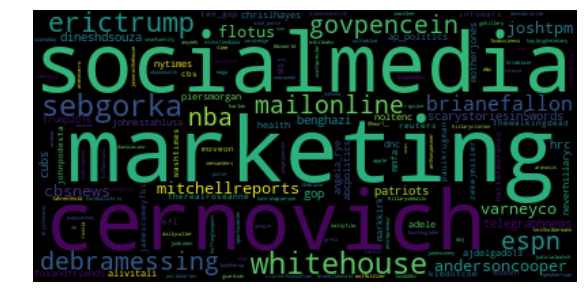

In [105]:
freq = dict(zip(terms, des_order_centroids[0,:]))

wordcloud = WordCloud().fit_words(freq)
plt.figure(figsize=(10,5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()







## Task 2.1 (10 pts) First, you apply the k-means algorithm. Create a plot of the SSE error of the k-means algorithm as a function of the number of clusters, for k up to 20, in order to determine the optimal number of clusters.

Text(0, 0.5, 'SSE')

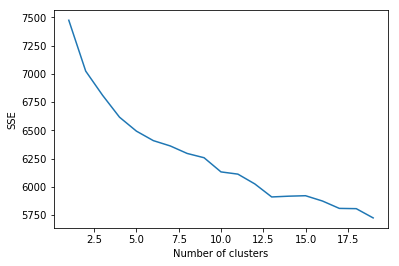

In [87]:
#### Find the best K value

error = np.zeros(20)
for k in range(1,20):
    kmeans = sk_cluster.KMeans(n_clusters=k, n_init=10, max_iter=300)
    kmeans.fit_predict(tfidf_data)
    error[k] = kmeans.inertia_

plt.plot(range(1, 20), error[1:])
plt.xlabel('Number of clusters')
plt.ylabel('SSE')


# Task 2.2 (10 pts)

In [91]:
np.transpose(tfidf_data)
kmeans = sk_cluster.KMeans(n_clusters=20, n_init=10, max_iter=300)
kmeans.fit_predict(tfidf_data)


array([ 6,  5,  6, ..., 10,  6,  6], dtype=int32)

In [114]:
asc_order_centroids = kmeans.cluster_centers_.argsort() 
des_order_centroids = asc_order_centroids[:,::-1]
terms = vectorizer.get_feature_names()
print ("All the terms:")
print(terms, '\n')

for i in range(20):
    print ("Cluster:", i)
    for ind in des_order_centroids[i, :40]:
        print (terms[ind])
    print()

All the terms:
['0hour1__', '2a', '8217', '_makada_', 'abc', 'abcpolitics', 'ac360', 'adele', 'ajdelgado13', 'alivitali', 'allenwest', 'amazon', 'america', 'amjoy', 'amjoyshow', 'amymek', 'ananavarro', 'andersoncooper', 'angela_rye', 'anncoulter', 'anthonyweiner', 'ap', 'ap_politics', 'apple', 'aravosis', 'arimelber', 'asamjulian', 'barackobama', 'bbcnews', 'bbcworld', 'bencjacobs', 'benghazi', 'benshapiro', 'berniesanders', 'bfraser747', 'billclinton', 'billkristol', 'billmaher', 'blacklivesmatter', 'bostonglobe', 'bpolitics', 'braddjaffy', 'breaking', 'breitbartnews', 'bretbaier', 'brexit', 'brianefallon', 'brianstelter', 'brithume', 'brunelldonald', 'business', 'buzzfeednews', 'c0nvey', 'carminezozzora', 'cavs', 'cbs', 'cbsnews', 'cernovich', 'change', 'charlesmblow', 'charliekirk11', 'chelseaclinton', 'cher', 'chriscuomo', 'chrislhayes', 'christichat', 'chucktodd', 'chuckwoolery', 'clinton', 'clintonemails', 'clintonfdn', 'clintonfoundation', 'cnbc', 'cnn', 'cnnbrk', 'cnnmoney', 'c